In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [44]:
#pemanggilan data
data = pd.read_csv("Titanic-Dataset.csv")

# **EKSPLORASI AWAL**

In [45]:
#melihat statistika deskriptif
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Berdasarkan output diatas jumlah total penumpang dalam data sebanyak 891

In [46]:
# Tabel jumlah penumpang selamat dan tidak selamat
survival_counts = data['Survived'].value_counts()
survival_percentage = data['Survived'].value_counts(normalize=True) * 100

In [47]:
survival_table = pd.DataFrame({
    'Status': ['Tidak Selamat', 'Selamat'],
    'Jumlah': survival_counts.values,
    'Persentase': survival_percentage.values.round(2)
})
print("Tabel Jumlah Penumpang Selamat dan Tidak Selamat:")
display(survival_table)

Tabel Jumlah Penumpang Selamat dan Tidak Selamat:


,Status,Jumlah,Persentase
0,Tidak Selamat,549,61.62
1,Selamat,342,38.38


<ipython-input-48-6a6702c9740d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=survival_table['Status'], y=survival_table['Jumlah'], palette=['#ff6b6b', '#51cf66'])


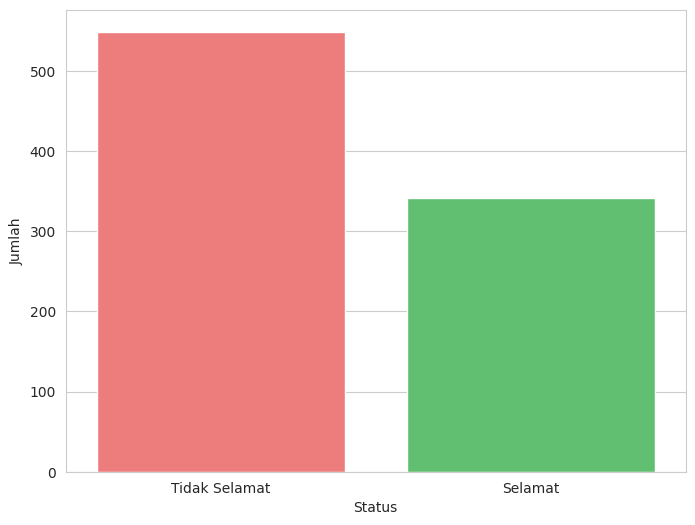

In [48]:
# Grafik batang jumlah penumpang selamat dan tidak selamat
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
bar_plot = sns.barplot(x=survival_table['Status'], y=survival_table['Jumlah'], palette=['#ff6b6b', '#51cf66'])

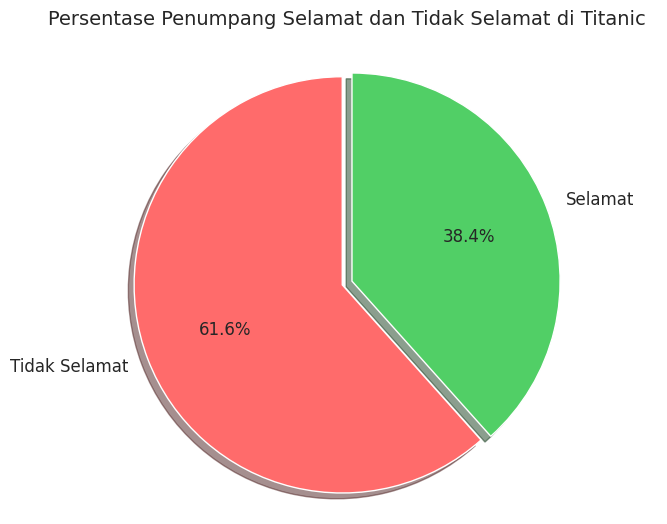

In [49]:

# Grafik pie persentase penumpang selamat dan tidak selamat
plt.figure(figsize=(8, 6))
plt.pie(survival_table['Jumlah'],
        labels=survival_table['Status'],
        autopct='%1.1f%%',
        colors=['#ff6b6b', '#51cf66'],
        startangle=90,
        explode=(0.05, 0),
        shadow=True,
        textprops={'fontsize': 12})
plt.title('Persentase Penumpang Selamat dan Tidak Selamat di Titanic', fontsize=14, pad=20)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

In [50]:
# Menghitung rata-rata umur penumpang
average_age = data['Age'].mean()
print(f"Rata-rata umur penumpang: {average_age:.2f} tahun")


Rata-rata umur penumpang: 29.70 tahun


In [51]:
# Menemukan penumpang termuda
youngest_passenger = data[data['Age'] == data['Age'].min()][['Name', 'Age']]
print("\nPenumpang Termuda:")
print(youngest_passenger)



Penumpang Termuda:
                                Name   Age
803  Thomas, Master. Assad Alexander  0.42


In [52]:
# Menemukan penumpang tertua
oldest_passenger = data[data['Age'] == data['Age'].max()][['Name', 'Age']]
print("\nPenumpang Tertua:")
print(oldest_passenger)


Penumpang Tertua:
                                     Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


In [53]:
# Menampilkan jumlah penumpang berdasarkan jenis kelamin
gender_counts = data['Sex'].value_counts()
print("Jumlah penumpang berdasarkan jenis kelamin:\n")
print(gender_counts)

Jumlah penumpang berdasarkan jenis kelamin:

Sex
male      577
female    314
Name: count, dtype: int64


In [54]:
# Menentukan siapa yang lebih banyak
more_common_gender = gender_counts.idxmax()
print(f"\nJenis kelamin yang lebih banyak: {more_common_gender.capitalize()}")




Jenis kelamin yang lebih banyak: Male


<ipython-input-55-80e5a54bb5d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")


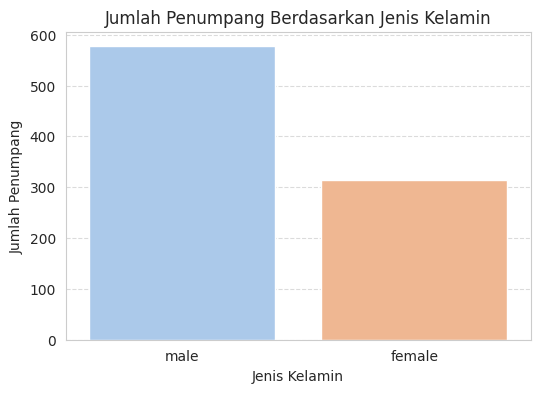

In [55]:
#Visualisasi dengan seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [56]:
# Menampilkan jumlah penumpang berdasarkan kelas (Pclass)
class_counts = data['Pclass'].value_counts().sort_index()
print("Jumlah penumpang berdasarkan kelas:\n")
print(class_counts)

Jumlah penumpang berdasarkan kelas:

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


In [57]:
# Menghitung persentase penumpang di kelas 1
total_passengers = data.shape[0]
class1_percentage = (class_counts[1] / total_passengers) * 100
print(f"\nPersentase penumpang di kelas 1: {class1_percentage:.2f}%")


Persentase penumpang di kelas 1: 24.24%


<ipython-input-58-a673823f7599>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette="muted")


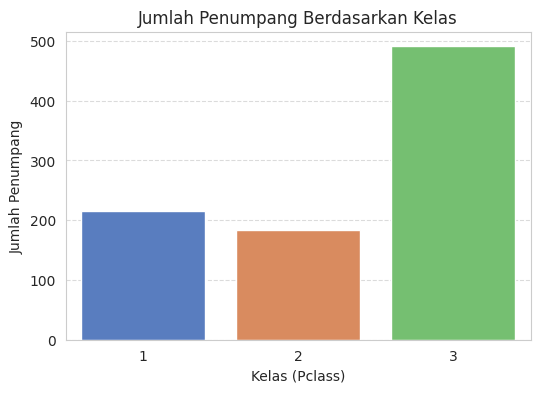

In [58]:
# Visualisasi
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette="muted")
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas (Pclass)')
plt.ylabel('Jumlah Penumpang')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **PREPROCESSING**

In [59]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [62]:
#melihat isi kolom "Age"
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [63]:
#melihat isi kolom "Cabin"
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [64]:
#melihat isi kolom "Embarked"
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [65]:
#mencari jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(866)

Data tersebut terdapat missing value. Jumlah missing value data tersebut sebanyak 866.
Kita akan tidak akan mengisi keseluruhan missing value diseluruh dataset.
1.  Kolom Age akan kita isi missing value menggunakan median.
2.  Kolom Cabin akan kita hapus.
3.  Kolom Embarked akan kita isi missing value menggunakan modus.

In [66]:
#mengisi missing value kolom Age
data['Age']=data['Age'].fillna(data['Age'].median())

In [67]:
#jumlah missing value
np.sum(data['Age'].isnull())

np.int64(0)

In [68]:
#menghapus kolom Cabin
data.drop(columns=['Cabin'], inplace=True)

In [69]:
#mengisi missing value kolom Embarked
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-69-ea070e99fd83>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [70]:
#jumlah missing value
np.sum(data['Embarked'].isnull())

np.int64(0)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Dengan ini missing value pada dataset tersebut sudah terisi semua dan kolom cabin sudah terhapus.

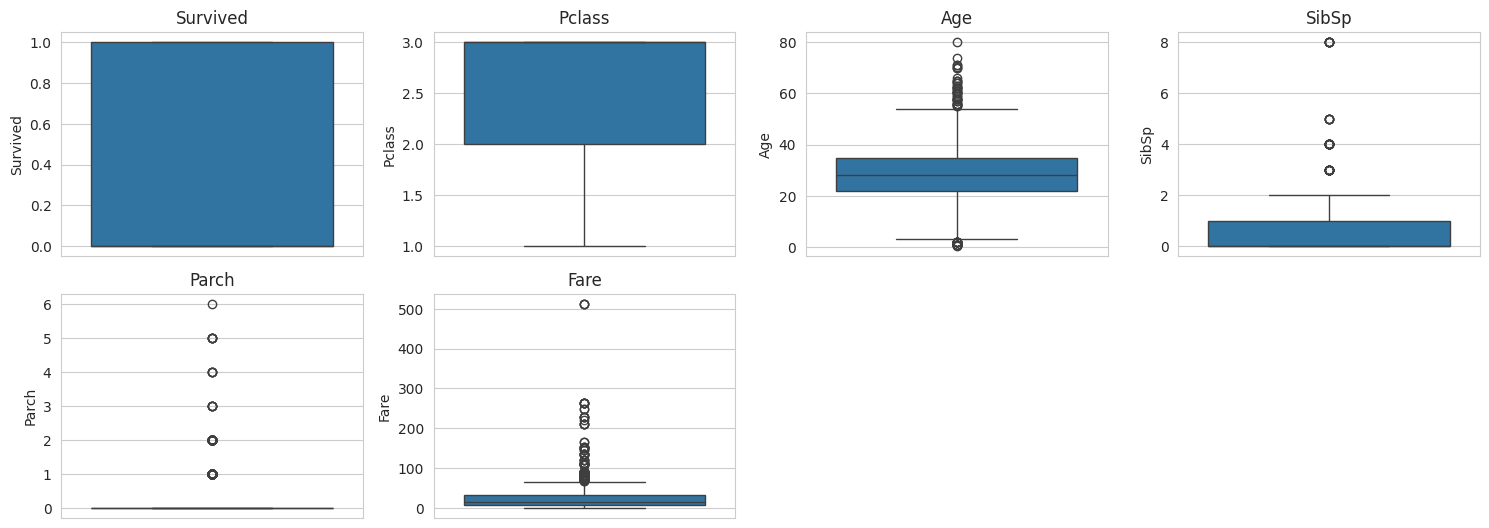

In [76]:
# Kolom numerik yang ingin dicek outliernya
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [77]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


Outlier adalah bagian dari data yang sangat berbeda dari sebagian besar data lainnya. Mungkin sulit untuk menentukan apa yang tepat dianggap sebagai outlier, karena bisa bersifat subjektif. Outlier dapat dianggap sebagai bagian data yang sangat rendah atau tinggi, jauh dari rata-rata atau norma dari kumpulan data. Outlier bisa disebabkan oleh kebetulan atau kesalahan dalam pengukuran. Hal ini dapat mempengaruhi hasil analisis data secara keseluruhan, sehingga penting untuk mengidentifikasi dan menghapus outlier dari data.


Kita akan mengatasi outlier tersebut menggunakan metode Winsorizing. Winsorizing yaitu mengganti outlier dengan batas IQR

In [78]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

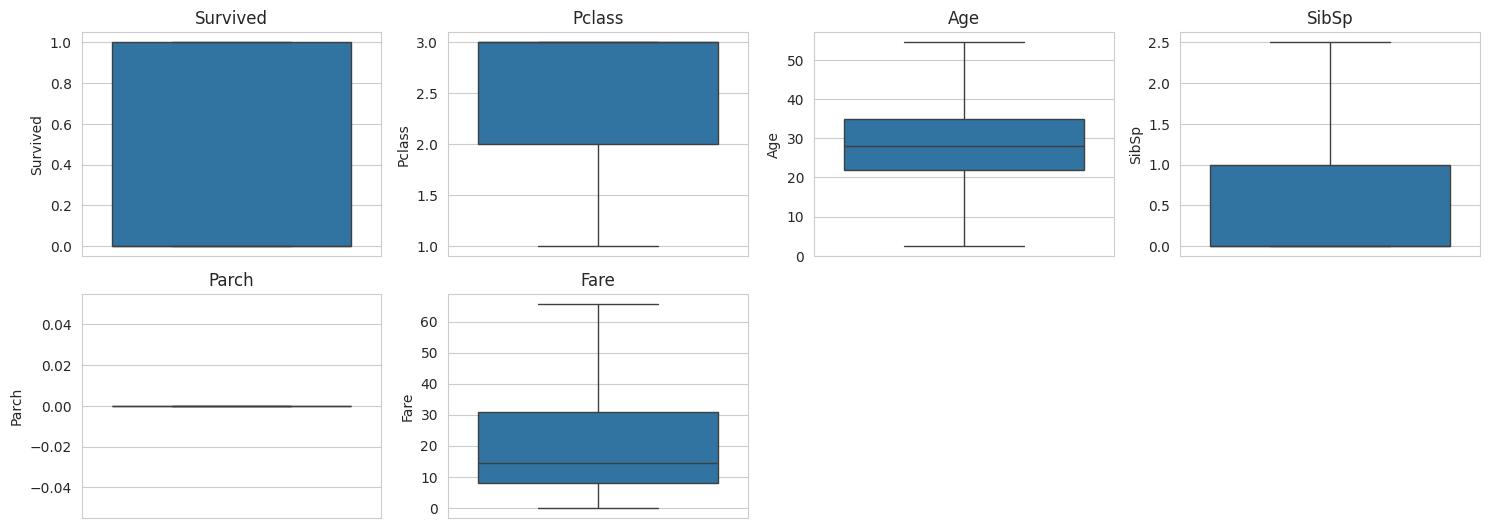

In [79]:
#cek boxplot lagi

num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Selanjutnya kita perlu melakukan encoding data kategorik. Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam algoritma Machine Learning. Model Machine Learning umumnya hanya dapat bekerja dengan angka, sehingga data kategorik harus dikonversi terlebih dahulu sebelum digunakan dalam pemodelan.

Pada dataset ini, kolom yang memerlukan encoding yaitu kolom sex, dan embarked.

In [82]:
#melihat isi dalam kolom
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [83]:
#mengubah data Sex menjadi numerik
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [84]:
data['Sex'].unique()

array([1, 0])

In [85]:
#melihat isi dalam kolom
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [86]:
#mengubah data Embarked menjadi numerik
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Embarked']=le.fit_transform(data['Embarked'])

In [87]:
data['Embarked'].unique()

array([2, 0, 1])

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 76.7+ KB


Selanjutnya kita perlu melakukan standarisasi/scaling terhadap data tersebut.

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_test = sc.fit_transform(data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])
print(data_test)

[[-0.78927234  0.82737724  0.73769513 ...  0.         -0.82055245
   0.58595414]
 [ 1.2669898  -1.56610693 -1.35557354 ...  0.          2.03162322
  -1.9423032 ]
 [ 1.2669898   0.82737724 -1.35557354 ...  0.         -0.78757757
   0.58595414]
 ...
 [-0.78927234  0.82737724 -1.35557354 ...  0.         -0.02915533
   0.58595414]
 [ 1.2669898  -1.56610693  0.73769513 ...  0.          0.29082313
  -1.9423032 ]
 [-0.78927234  0.82737724  0.73769513 ...  0.         -0.79612661
  -0.67817453]]


# **MODELLING**

Pemisahan dataset (split dataset) dilakukan untuk membagi data menjadi dua bagian: data latih (training set) dan data uji (testing set).

Data latih digunakan untuk melatih model machine learning. Model mempelajari pola dan hubungan antara fitur (variabel independen) dan target (variabel dependen) dari data ini. Tujuannya adalah agar model dapat menyesuaikan parameter internalnya sehingga mampu membuat prediksi yang akurat.

Data uji berfungsi untuk menguji performa model setelah dilatih. Data ini tidak digunakan selama pelatihan, sehingga dapat mengukur seberapa baik model menggeneralisasi pada data baru. Evaluasi menggunakan data uji membantu memastikan bahwa model tidak hanya menghafal data latih (overfitting), tetapi benar-benar memahami pola yang mendasarinya.

Pembagian Data yang Umum Digunakan
Tidak ada aturan pasti dalam menentukan rasio pembagian, tetapi beberapa praktik umum meliputi:

Pembagian standar (80:20 atau 70:30) – Sekitar 80% data untuk latih dan 20% untuk uji. Ini adalah pilihan yang baik untuk dataset berukuran sedang.
Dataset besar (90:10 atau 95:5) – Jika dataset sangat besar, porsi data uji bisa diperkecil karena model tetap dapat belajar dengan baik dari data latih yang banyak, namun tetap membutuhkan cukup data uji untuk evaluasi yang akurat.

Sehingga pada kasus ini, pembagian yang digunakan adalah 80:20, di mana 80% data untuk pelatihan dan 20% untuk pengujian.

In [91]:
from sklearn.model_selection import train_test_split
#menghilangkan data object
data=data.drop(['PassengerId','Name','Ticket'],axis=1)

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 891
Total # of sample in train dataset: 712
Total # of sample in test dataset: 179


In [93]:
print(X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
331     1.0    1  45.5    0.0    0.0  28.5000         2
733     2.0    1  23.0    0.0    0.0  13.0000         2
382     3.0    1  32.0    0.0    0.0   7.9250         2
704     3.0    1  26.0    1.0    0.0   7.8542         2
813     3.0    0   6.0    2.5    0.0  31.2750         2
..      ...  ...   ...    ...    ...      ...       ...
106     3.0    0  21.0    0.0    0.0   7.6500         2
270     1.0    1  28.0    0.0    0.0  31.0000         2
860     3.0    1  41.0    2.0    0.0  14.1083         2
435     1.0    0  14.0    1.0    0.0  65.6344         2
102     1.0    1  21.0    0.0    0.0  65.6344         2

[712 rows x 7 columns]


In [94]:
print(y_train)

331    0.0
733    0.0
382    0.0
704    0.0
813    0.0
      ... 
106    1.0
270    0.0
860    0.0
435    1.0
102    0.0
Name: Survived, Length: 712, dtype: float64


In [95]:
print(X_test)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
709     3.0    1  28.0    1.0    0.0  15.2458         0
439     2.0    1  31.0    0.0    0.0  10.5000         2
840     3.0    1  20.0    0.0    0.0   7.9250         2
720     2.0    0   6.0    0.0    0.0  33.0000         2
39      3.0    0  14.0    1.0    0.0  11.2417         0
..      ...  ...   ...    ...    ...      ...       ...
433     3.0    1  17.0    0.0    0.0   7.1250         2
773     3.0    1  28.0    0.0    0.0   7.2250         0
25      3.0    0  38.0    1.0    0.0  31.3875         2
84      2.0    0  17.0    0.0    0.0  10.5000         2
10      3.0    0   4.0    1.0    0.0  16.7000         2

[179 rows x 7 columns]


In [96]:
print(y_test)

709    1.0
439    0.0
840    0.0
720    1.0
39     1.0
      ... 
433    0.0
773    0.0
25     1.0
84     1.0
10     1.0
Name: Survived, Length: 179, dtype: float64


# **KNN**

KNN (K-Nearest Neighbor) adalah sebuah algoritma klasifikasi dan regresi dalam bidang data mining yang digunakan untuk memprediksi kelas atau nilai suatu data berdasarkan kemiripan dengan data-data lainnya yang ada dalam dataset pelatihan. Algoritma ini bekerja dengan mencari K tetangga terdekat dari data yang akan diprediksi, kemudian memprediksi kelas atau nilai berdasarkan kelas atau nilai rata-rata dari tetangga-tetangga tersebut.

Untuk cara kerjanya sebagai berikut.
1.  Menentukan berapa banyak tetangga terdekat yang akan dipertimbangkan dalam proses prediksi.
2.  Menghitung jarak antara data yang akan diprediksi dengan semua data dalam dataset pelatihan.
3.  Memilih K data terdekat berdasarkan jarak yang telah dihitung.
4.  Prediksi: Klasifikasi memprediksi kelas dari data tersebut berdasarkan kelas yang paling banyak di antara K tetangga terdekatnya. Dan regresi memprediksi nilai dari data tersebut berdasarkan nilai rata-rata atau median dari K tetangga terdekatnya.

**Training**

In [97]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions


In [98]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [99]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [100]:
model = []
model.append(('KNN', KNeighborsClassifier()))

**Modelling**

In [101]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [102]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [103]:
#Hitung MSE untuk data train dan data test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [104]:
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.109394506866417
MSE data test: 0.23960273122284292


**Hasil Evaluasi Model KNN**

In [105]:
y_pred = classifier.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[86 19]
 [38 36]]


0.6815642458100558

Dari confusion matrix diperoleh banyak orang yang diprediksi tenggelam dan benar-benar tenggelam adalah 86, diprediksi selamat tetapi sebenarnya tenggelam sebanyak 19 orang, diprediksi tenggelam tetapi sebenarnya selamat 38 orang, dan diprediksi selamat dan benar-benar selamat 36 orang. Nilai akurasi model KNN adalah 68,1%

# **NAIVE BAYES**

Naive bayes merupakan metode pengklasifikasian berdasarkan probabilitas sederhana dan dirancang agar dapat dipergunakan dengan asumsi antar variabel penjelas saling bebas (independen). Pada algoritma ini pembelajaran lebih ditekankan pada pengestimasian probabilitas. Cara Kerja model Naive bayes yaitu tahapan diawali dengan mengambil data testing, menghitung nilai probabilitas setiap kriteria berdasarkan dari data latih, setelah menghitung nilai probabilitas setiap kriteria berdasarkan dari data latih, selanjutnya menghitung nilai probabilitas tiap-tiap fitur berdasarkan data testing dan data latih. Mengalikan hasil dari P(Y) pada masing-masing kelas dan data uji.

**Modelling**

In [108]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [109]:
# fit train set pakai Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [110]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.7626404494382022

In [114]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

**Evaluasi Model Naive Bayes**

In [115]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict['NB'])
print(cm)

[[77 28]
 [14 60]]


In [116]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.7654


Dari confusion matrix diperoleh banyak orang yang diprediksi tenggelam dan benar-benar tenggelam adalah 77, diprediksi selamat tetapi sebenarnya tenggelam sebanyak 28 orang, diprediksi tenggelam tetapi sebenarnya selamat 14 orang, dan diprediksi selamat dan benar-benar selamat 60 orang. Nilai akurasi model Naive Bayes adalah 76,54%

# **Neural Network**

Neural network atau disebut juga dengan Artificial Neural Network (ANN) adalah sekumpulan algoritma machine learning yang dirancang untuk mengenali pola datadengan meniru cara kerja sel saraf manusia (neuron).

Cara kerja Neural Network mirip neuron otak, saat stimulan masuk, neuron memprosesnya lalu menghasilkan output tertentu. Ada pun kunci utama network ini yaitu adanya jaringan tersembunyi. Lapisan tersebut melakukan adaptasi saat stimulan masuk secara otomatis lalu melakukan proses distribusi. Bukan artinya kedua jenis lapisan lainnya itu tidak penting, masing-masing punya tugas atau peran berbeda. Lapisan di tingkat paling terakhir berfungsi mengeluarkan hasil atau output dari pemrosesan stimulan. Semisal lapisan tersebut terganggu, output bisa tidak maksimal kondisinya. Kondisi seperti itu mirip dengan saat otak Anda tidak sinkron dengan anggota tubuh tertentu.



**Modelling**

In [117]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [118]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200}


In [119]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [120]:
y_pred = clf.predict(X_test)

**Evaluasi Model Neural Network**

In [121]:
#CONFUSION MATRIX NEURAL NETWORK
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[83 22]
 [20 54]]


In [122]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.765

Dari confusion matrix diperoleh banyak orang yang diprediksi tenggelam dan benar-benar tenggelam adalah 83, diprediksi selamat tetapi sebenarnya tenggelam sebanyak 22 orang, diprediksi tenggelam tetapi sebenarnya selamat 20 orang, dan diprediksi selamat dan benar-benar selamat 54 orang. Nilai akurasi model neural network adalah 76,5%.

Dari hasil evaluasi ketiga model klasifikasi diatas, dapat diketahui bahwa model terbaik terkhusus kasus ini yaitu Naive bayes dengan akurasi 76,54%. Meskpipun selisih sedikit dengan model Neural Network namun ada alasan tersendiri kenapa model Naive Bayes menjadi yang terbaik. Alasannya yaitu sebagai berikut.
1.  Algoritma ini sederhana dan mampu melakukan prediksi dengan sangat cepat.
2.  Dibandingkan model-model yang lain, Naive Bayes cenderung lebih kecil risikonya mengalami overfitting.
3.  Selain itu, Naive Bayes sangat efektif digunakan ketika fitur-fitur dalam data independen.

# **EVALUASI**

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict['NB']))

              precision    recall  f1-score   support

         0.0       0.85      0.73      0.79       105
         1.0       0.68      0.81      0.74        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179



Dari data tersebut diperoleh informasi bahwa: nilai precision penumpang selamat yaitu 0,68. Artinya 68% penumpang yang diprediksi selamat benar-benar selamat. nilai recall = 0,81. Artinya 81% dari penumpang yang selamat berhasil diprediksi oleh model.

In [124]:
#jumlah penumpang yang diprediksi selamat
jumlah_diprediksi_selamat=len(y_predict['NB'][y_predict['NB']==1])
print(f"Jumlah penumpang yang diprediksi selamat: {jumlah_diprediksi_selamat}")

#jumlah penumpang yang benar-benar selamat di antara yang diprediksi selamat
jumlah_benar_selamat=len(y_predict['NB'][(y_predict['NB']==1)&(y_test==1)])
print(f"Jumlah penumpang yang benar-benar selamat di antara yang diprediksi selamat: {jumlah_benar_selamat}")

Jumlah penumpang yang diprediksi selamat: 88
Jumlah penumpang yang benar-benar selamat di antara yang diprediksi selamat: 60
